In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base=automap_base()
# reflect the tables
base.prepare(autoload_with=engine)
# base.classes.keys()

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measure=base.classes.measurement
station=base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# session.query(func.max(measure.date)).all() - same same, but different
session.query(measure.date).order_by(measure.date.desc()).first()



('2017-08-23',)

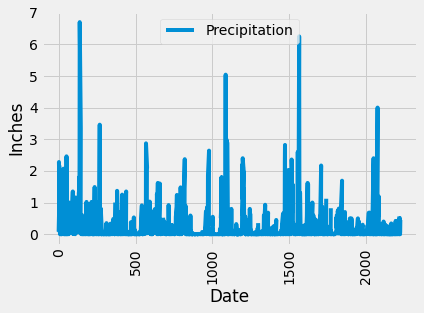

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query_data=session.query(measure.date,measure.prcp).\
    filter(measure.date > '2016-08-23').\
    order_by(measure.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_data=pd.DataFrame(query_data, columns=['Date','Precipitation'])

# Sort the dataframe by date
precipitation_data=precipitation_data.sort_values(['Date'], ascending=False)
precipitation_data

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_data.plot(rot=90)

# plt.xticks(precipitation_data['Date'])
plt.xlabel('Date')
plt.ylabel('Inches')

# plt.savefig("../Outputs/precipitation_data.png")
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_data.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(station.id).count()

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measure.station, func.count(measure.id)).\
    group_by(measure.station).order_by(func.count(measure.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(
    func.min(measure.tobs),
    func.max(measure.tobs),
    func.avg(measure.tobs)).filter(measure.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

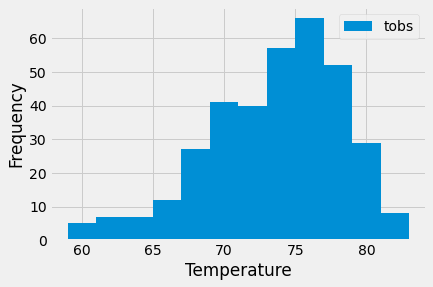

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station=session.query(measure.date,measure.tobs).\
    filter(measure.date > '2016-08-23').\
    filter(measure.date <= '2017-08-23').\
    filter(measure.station=='USC00519281').all()

most_active_station=pd.DataFrame(active_station)

most_active_station.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close session

In [28]:
# Close Session
session.close()